In [1]:
from functions import *

In [2]:
polymer_directory = '/mnt/home/tudomlumleart/ceph/01_TetheringSimulation/LoopExtrusion_HoxA_mESC_w_RingBin_dirCTCF_sticky'

In [4]:
def load_polymer_hdf5(polymer_directory):
    URIs = polychrom.hdf5_format.list_URIs(polymer_directory)
    [num_monomers, _] = polychrom.hdf5_format.load_URI(URIs[0])["pos"].shape
    num_polymers = len(URIs)
    print(num_monomers)
    polys = np.full((num_monomers, 3, num_polymers), np.nan)
    dmaps = np.full((num_monomers, num_monomers, num_polymers), np.nan)
    for iURI, URI in enumerate(URIs):
        data = polychrom.hdf5_format.load_URI(URI)
        xyz = data["pos"]
        polys[:, :, iURI] = xyz[:num_monomers, :]
        dmaps[:, :, iURI] = squareform(pdist(xyz[:num_monomers, :]))
    return polys, dmaps


In [5]:
polys, dmaps = load_polymer_hdf5(polymer_directory)

333


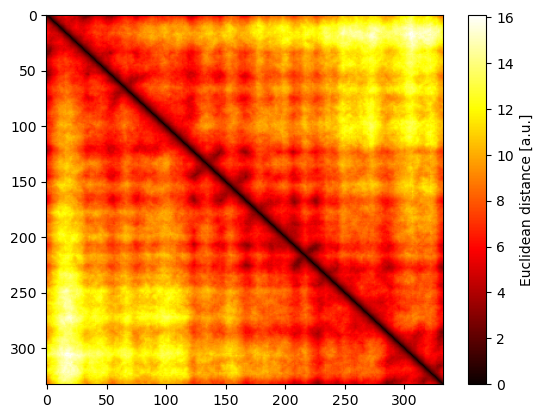

In [6]:
visualize_dmap(np.median(dmaps, 2))

In [15]:
num_monomers, _, num_observations = dmaps.shape
dmaps_flat = dmaps.reshape([num_monomers**2, num_observations]).T

In [17]:
dmaps_flat[0,:]

array([0.        , 0.9845306 , 1.5171016 , ..., 1.58309813, 0.98523967,
       0.        ])

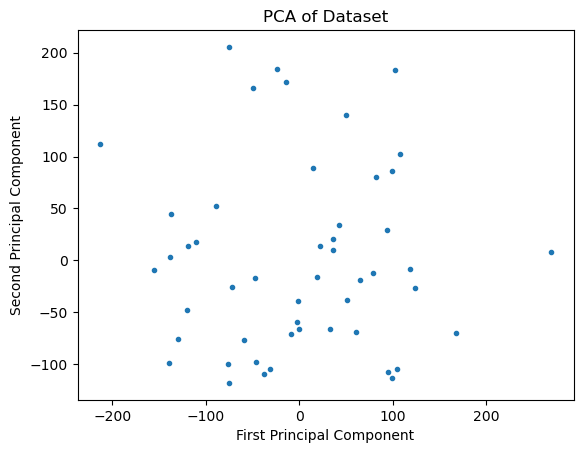

In [18]:
# Use PCA 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Visualize PCA of original structures 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(dmaps_flat)

# Apply PCA
pca = PCA(n_components=2)  # Choose the number of components
X_pca = pca.fit_transform(X_scaled)

# Visualize results
plt.scatter(X_pca[:, 0], X_pca[:, 1], marker='.')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA of Dataset')
plt.show()

In [35]:
polymer_directory = '/mnt/home/tudomlumleart/ceph/01_TetheringSimulation/LoopExtrusion_HoxA_mESC_w_RingBin_dirCTCF_sticky_3_updatedScheme'

In [36]:
polys, dmaps = load_polymer_hdf5(polymer_directory)

333


In [39]:
dmaps.shape

(333, 333, 1000)

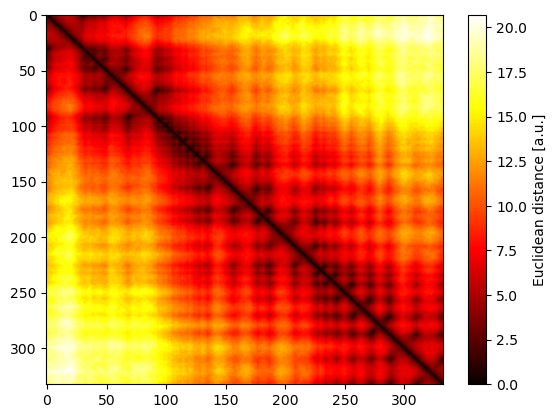

In [83]:
visualize_dmap(np.median(dmaps[:, :, 0:1000:10], 2))

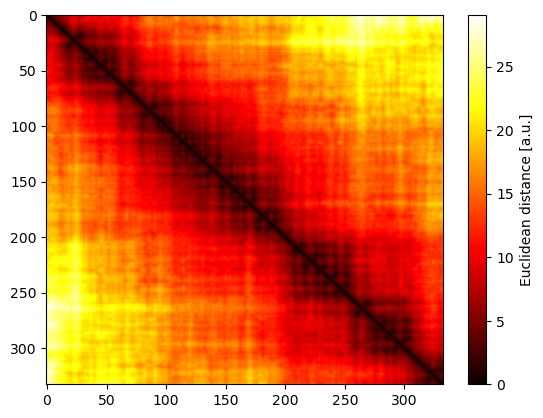

In [79]:
visualize_dmap(np.median(dmaps[:, :, 20:30], 2))

In [44]:
observations_class_list_OG = []
for i in range(100):
    for j in range(10):
        observations_class_list_OG.append(i)

In [53]:
observations_class_list_OG

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,


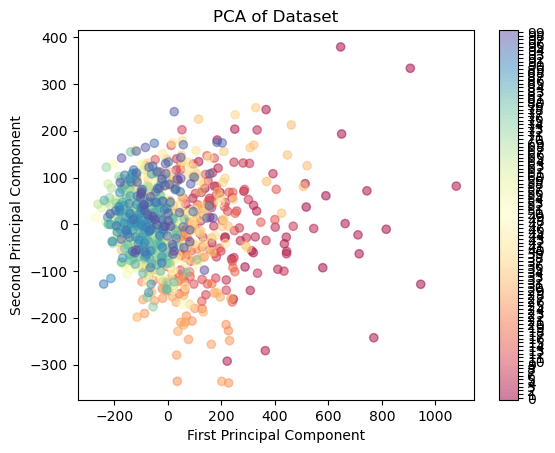

In [76]:
# Use PCA 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

num_monomers, _, num_observations = dmaps.shape
dmaps_flat = dmaps.reshape([num_monomers**2, num_observations]).T

# Visualize PCA of original structures 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(dmaps_flat)

# Apply PCA
pca = PCA(n_components=2)  # Choose the number of components
X_pca = pca.fit_transform(X_scaled)

# Visualize results
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=observations_class_list_OG, alpha=0.5, cmap='Spectral')
plt.colorbar(boundaries=np.arange(100+1)-0.5).set_ticks(np.arange(100))
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA of Dataset')
plt.show()

/tmp/ipykernel_1493597/4155504174.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_pca[:10, 0], X_pca[:10, 1], alpha=0.5, cmap='Spectral')


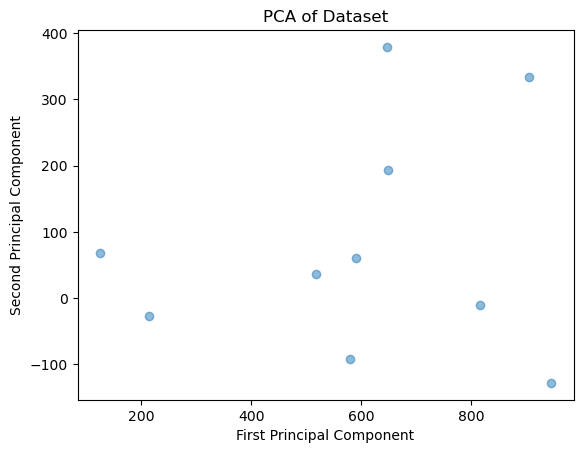

In [78]:
# Visualize results
plt.scatter(X_pca[:10, 0], X_pca[:10, 1], alpha=0.5, cmap='Spectral')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA of Dataset')
plt.show()

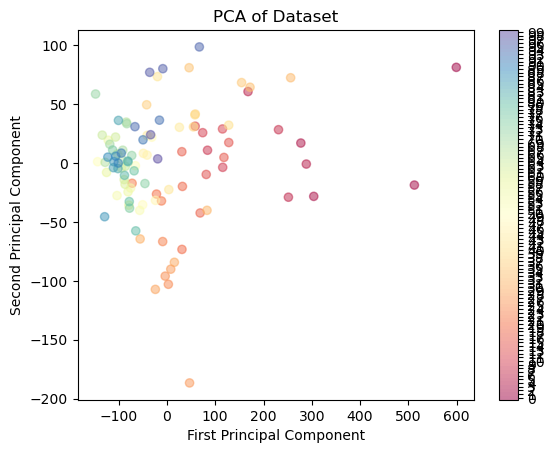

In [56]:
# Use PCA 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

num_monomers, _, num_observations = dmaps.shape
dmaps_flat = dmaps.reshape([num_monomers**2, num_observations]).T

# Visualize PCA of original structures 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(dmaps_flat)

# Apply PCA
pca = PCA(n_components=2)  # Choose the number of components
X_pca = pca.fit_transform(X_scaled)

X_pca_mean = [np.mean(X_pca[i*10:(i+1)*10, 0]) for i in range(100)]
Y_pca_mean = [np.mean(X_pca[i*10:(i+1)*10, 1]) for i in range(100)]

# Visualize results
plt.scatter(X_pca_mean, Y_pca_mean, c=np.arange(100), alpha=0.5, cmap='Spectral')
plt.colorbar(boundaries=np.arange(100+1)-0.5).set_ticks(np.arange(100))
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA of Dataset')
plt.show()

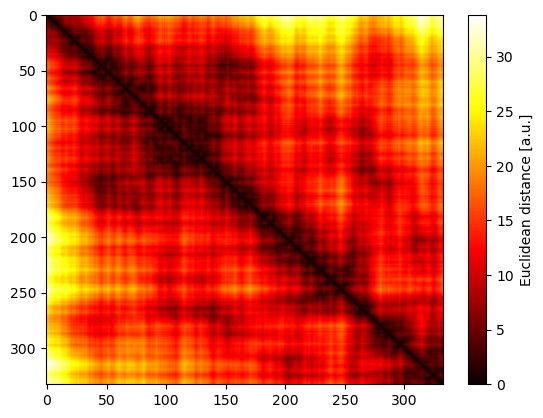

In [59]:
visualize_dmap(dmaps[:, :, 2])

In [62]:
from scipy.stats import pearsonr